In [1]:
import numpy as np
from sectionproperties.pre.library import circular_section, rectangular_section

import concreteproperties.stress_strain_profile as ssp
from concreteproperties import (
    Concrete,
    ConcreteSection,
    SteelBar,
    add_bar_rectangular_array,
)
from concreteproperties.results import MomentCurvatureResults

Using PARDISO solver


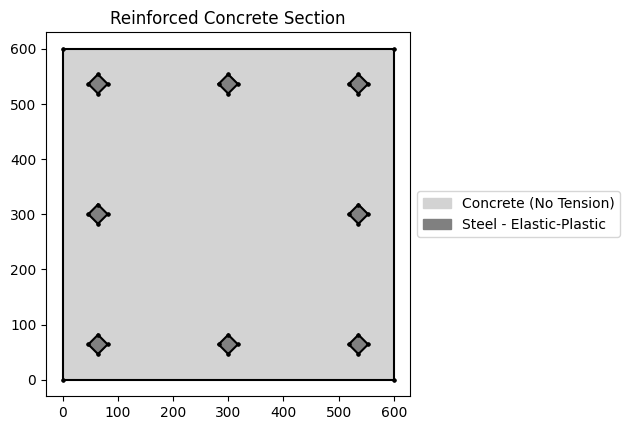

<Axes: title={'center': 'Reinforced Concrete Section'}>

In [2]:
concrete = Concrete(
    name="Concrete (No Tension)",
    density=2.4e-6,
    stress_strain_profile=ssp.ConcreteLinearNoTension(
        elastic_modulus=35e3,
        ultimate_strain=0.003,
        compressive_strength=31,
    ),
    ultimate_stress_strain_profile=ssp.BilinearStressStrain(
        compressive_strength=31,
        compressive_strain=0.00175,
        ultimate_strain=0.0035,
    ),
    flexural_tensile_strength=3.5,
    colour="lightgrey",
)

steel = SteelBar(
    name="Steel - Elastic-Plastic",
    density=7.85e-6,
    stress_strain_profile=ssp.SteelElasticPlastic(
        yield_strength=320,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

geom = rectangular_section(d=600, b=600, material=concrete)
geom = add_bar_rectangular_array(
    geometry=geom,
    area=610,
    material=steel,
    n_x=3,
    x_s=236,
    n_y=3,
    y_s=236,
    anchor=(64, 64),
    exterior_only=True,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

In [3]:
res_n0 = conc_sec.moment_curvature_analysis(n=0, kappa_inc=1e-6, progress_bar=True)
res_n1 = conc_sec.moment_curvature_analysis(
    n=0.2 * 600 * 600 * 31, kappa_inc=1e-6, progress_bar=True
)
res_nt = conc_sec.moment_curvature_analysis(
    n=-1000e3, kappa_inc=1e-6, progress_bar=True
)

Output()

Output()

Output()

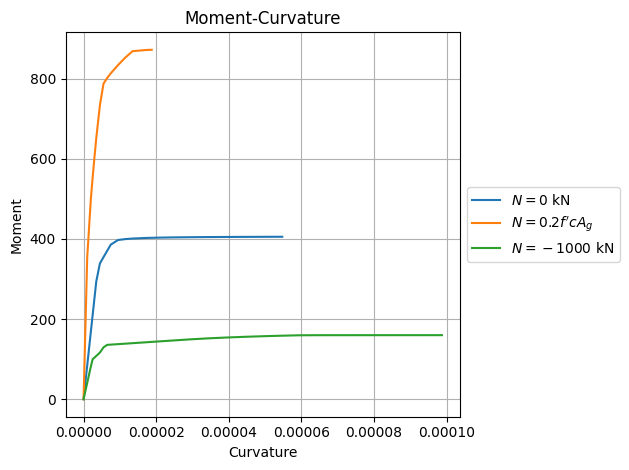

<Axes: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [7]:
MomentCurvatureResults.plot_multiple_results(
    moment_curvature_results=[res_n0, res_n1, res_nt],
    labels=["$N=0$ kN", "$N=0.2f'cA_g$", "$N=-1000$ kN"],
    fmt="-",
)